In [1]:
import twosigmafunc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sb
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
train, origin_features = twosigmafunc.preprocess()

In [7]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [7]:
train.fillna(train.median(), inplace=True)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.414776,0.000098,-0.000000e+00,-2.000000e+00,0.000011,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.273607,0.000098,-0.000000e+00,-2.000000e+00,0.000011,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.175710,0.000098,-0.000000e+00,-2.000000e+00,0.000011,-0.020940
3,25,0,-0.000837,0.005523,0.021095,0.002476,0.011752,0.178495,-0.007395,-0.007262,...,1.035936,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.211506,0.000098,-0.000000e+00,-2.000000e+00,0.000011,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.001957,0.000098,-0.000000e+00,0.000000e+00,0.000011,-0.007338
5,27,0,0.346856,0.166239,-6.080701,-0.992249,-0.125916,0.345812,-0.007395,-0.584239,...,-0.379366,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.001957,0.000098,-0.000000e+00,-2.000000e+00,0.000011,0.031425
6,31,0,0.072036,0.014931,0.021095,0.014063,0.011752,-0.193205,-0.007395,-0.030291,...,1.232558,-3.951567e-12,-1.418487e-13,-1.591224e-16,0.350685,0.000098,-0.000000e+00,-2.000000e+00,0.000011,-0.032895
7,38,0,0.300062,0.071251,-0.074451,-0.065292,-0.011286,0.026365,0.210249,0.167494,...,0.242646,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.168077,0.000098,-0.000000e+00,-2.000000e+00,0.000011,0.015803
8,39,0,-0.003511,-0.034270,0.082372,-0.023937,-0.025750,0.007815,0.263451,-0.241212,...,0.186175,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.300842,0.000098,-0.000000e+00,-2.000000e+00,0.000011,-0.027593
9,40,0,-0.083330,0.081935,-2.048438,-0.206856,-0.839563,-0.234100,-0.291853,-5.722336,...,-0.021965,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.386579,0.000098,-0.000000e+00,-2.000000e+00,0.000011,0.006662


In [6]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.414776,0.000098,-0.0,-2.0,0.000011,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.273607,0.000098,-0.0,-2.0,0.000011,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.175710,0.000098,-0.0,-2.0,0.000011,-0.020940
3,25,0,-0.000837,0.005523,0.021095,0.002476,0.011752,0.178495,-0.007395,-0.007262,...,1.035936,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.211506,0.000098,-0.0,-2.0,0.000011,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.001957,0.000098,-0.0,0.0,0.000011,-0.007338


In [8]:
train['tec123'] = train.technical_20 + train.technical_13 - train.technical_30
train['tec23'] = train.technical_20 - train.technical_30

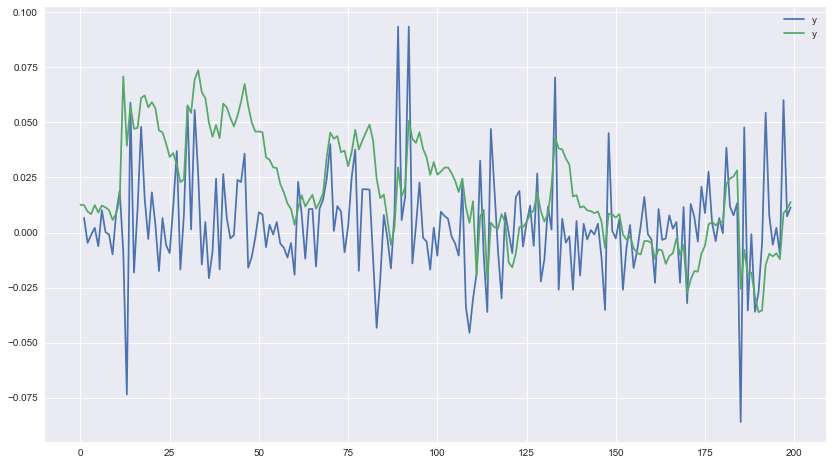

In [12]:
id = 40
loc = 200
plt.plot(train.loc[train.id == id, 'timestamp'][:loc], train.loc[train.id == id, 'y'].shift()[:loc], label='y')
plt.plot(train.loc[train.id == id, 'timestamp'][:loc], train.loc[train.id == id, 'tec123'][:loc] * 5, label='y')
plt.legend()

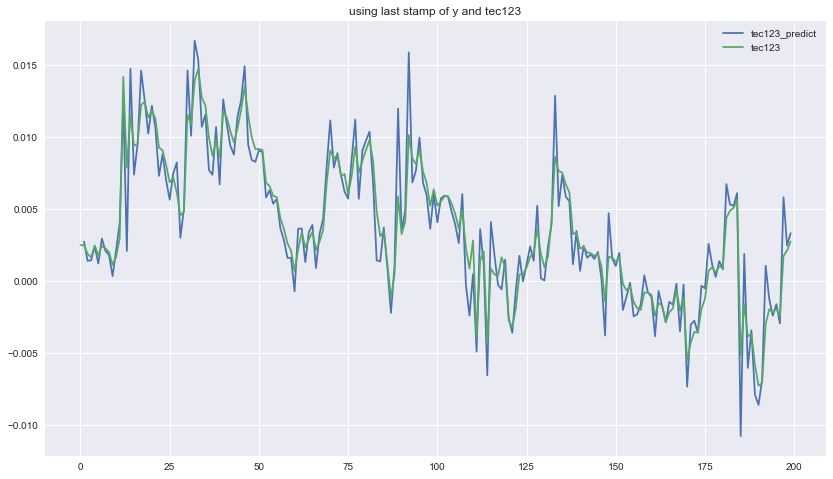

In [25]:
id = 40
loc = 200
plt.plot(train.loc[train.id == id, 'timestamp'][:loc], train.loc[train.id == id, 'y'].shift()[:loc] * 0.07 
         + train.loc[train.id == id, 'tec123'][:loc] * 0.92, label='tec123_predict')
plt.plot(train.loc[train.id == id, 'timestamp'][:loc], train.loc[train.id == id, 'tec123'][:loc], label='tec123')
plt.title('using last stamp of y and tec123')
plt.legend()

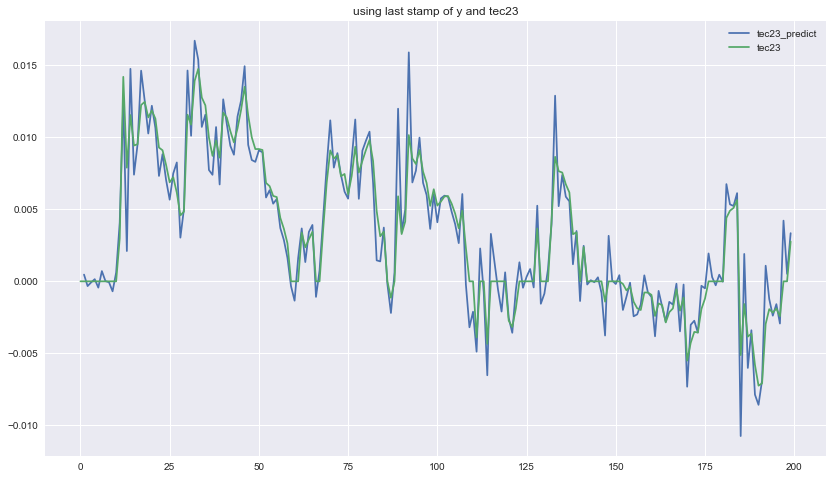

In [26]:
id = 40
loc = 200
plt.plot(train.loc[train.id == id, 'timestamp'][:loc], train.loc[train.id == id, 'y'].shift()[:loc] * 0.07 
         + train.loc[train.id == id, 'tec23'][:loc] * 0.92, label='tec23_predict')
plt.plot(train.loc[train.id == id, 'timestamp'][:loc], train.loc[train.id == id, 'tec23'][:loc], label='tec23')
plt.title('using last stamp of y and tec23')
plt.legend()

In [37]:
ids = np.random.choice(train.id.unique(), 50)

In [23]:
def tec_pred_r(ids, feature, a=0.07, b=0.92):
    r = []
    for id in list(ids):
        pred = train.loc[train.id == id, 'y'].shift() * a + train.loc[train.id == id, feature] * b
        tec = train.loc[train.id == id, feature]
        r.append(twosigmafunc.R_score(pred, tec))
    return np.array(r).mean()


In [38]:
tec_pred_r(ids, 'tec123')

0.93053857017222896

In [39]:
tec_pred_r(ids, 'tec23')

0.92869555555668826

# using LinearRegression to fit `tec123` 

In [5]:
from sklearn.linear_model import LinearRegression, Ridge
lr = LinearRegression(n_jobs=-1)

In [9]:
train = train[['id', 'timestamp', 'tec123', 'y']]

In [10]:
train.sort_values(['id', 'timestamp'], inplace=True)
train['id_diff'] = train.id.diff()
train['y_past'] = train.y.shift()
train['tec123_past'] = train.tec123.shift()
train.loc[train.id_diff != 0, ['y_past', 'tec123_past']] = 0

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [11]:
train['y_past2'] = train.y_past.shift()
train['tec123_past2'] = train.tec123_past.shift()
train.loc[train.id_diff != 0, ['y_past2', 'tec123_past2']] = 0
train.fillna(0, inplace=True)

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [11]:
train.head()

,id,timestamp,tec123,y,id_diff,y_past,tec123_past,y_past2,tec123_past2
131062,0,167,0.0,-0.007108,0.0,0.000000,0.0,0.000000,0.0
131895,0,168,0.0,0.001950,0.0,-0.007108,0.0,0.000000,0.0
132728,0,169,0.0,0.017724,0.0,0.001950,0.0,-0.007108,0.0
133561,0,170,0.0,0.012934,0.0,0.017724,0.0,0.001950,0.0
134393,0,171,0.0,-0.025229,0.0,0.012934,0.0,0.017724,0.0


In [12]:
low_y_cut = -0.075
high_y_cut = 0.075
y_is_above_cut = (train.y_past > high_y_cut)
y_is_below_cut = (train.y_past < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

In [13]:
lr.fit(train.loc[y_is_within_cut, ['tec123_past', 'tec123']], train.y_past[y_is_within_cut])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [14]:
lr.coef_

array([-8.08872128,  8.89837742])

In [15]:
lr.intercept_

-0.00026617524826966221

train with cut LR

In [17]:
pred = lr.predict(train[['tec123_past', 'tec123']]).clip(low_y_cut, high_y_cut)
twosigmafunc.R_score(pred, train.y_past)

0.82234774210670758

train without cut: LR

In [11]:
pred = lr.predict(train[['tec123_past', 'tec123']])
twosigmafunc.R_score(pred, train.y_past)

0.80742235794203554

In [76]:
np.corrcoef(train.y_past, train.y)[0][1]

-0.021368529889343027

In [12]:
np.corrcoef(train.y_past.cumsum(), train.y)[0][1]

0.00080093151065874788

In [16]:
np.corrcoef(train.y_past.diff().fillna(0), train.y)[0][1]

-0.010703423356465343

###  using last two timestamps

In [14]:
lr.fit(train.loc[y_is_within_cut, ['tec123_past2', 'tec123_past', 'tec123']], train.y_past[y_is_within_cut])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [16]:
pred = lr.predict(train[['tec123_past2', 'tec123_past', 'tec123']]).clip(low_y_cut, high_y_cut)
twosigmafunc.R_score(pred, train.y_past)

0.82294953672119942

In [18]:
lr.fit(train.loc[y_is_within_cut, ['tec123_past2', 'tec123_past', 'tec123', 'y_past2']], train.y_past[y_is_within_cut])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [19]:
pred = lr.predict(train[['tec123_past2', 'tec123_past', 'tec123', 'y_past2']]).clip(low_y_cut, high_y_cut)
twosigmafunc.R_score(pred, train.y_past)

0.82514349226346062

In [20]:
lr.coef_

array([-1.19131804, -6.92394018,  8.98684692, -0.10063864])

In [21]:
lr.intercept_

-0.00027107656554557725

using ridge

In [22]:
from sklearn.model_selection import GridSearchCV

In [25]:
ridge = Ridge()

In [23]:
params = {
    'alpha': [0.1, 1.0, 5.0],
    'normalize': [False, True]
}

In [27]:
grid = GridSearchCV(ridge, param_grid=params, cv=5)

In [28]:
grid.fit(train.loc[y_is_within_cut, ['tec123_past2', 'tec123_past', 'tec123', 'y_past2']], train.y_past[y_is_within_cut])

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1.0, 5.0], 'normalize': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
y_ridge = grid.predict(train[['tec123_past2', 'tec123_past', 'tec123', 'y_past2']]).clip(low_y_cut, high_y_cut)

In [34]:
twosigmafunc.R_score(y_ridge, train.y_past)

0.8209845900944156

`LinearRegression` is better, and I will use 1 timestamp past for prediction for simplicity

In [ ]:
array([-8.08872128,  8.89837742])

# Yeah! the formula is:
$$
y^n = -8.08872128tec123^{n-1} + 8.89837742tec123^{n} - 0.00026617524826966221
$$



# Let's try it 

In [13]:
train['y_pred'] = pred

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
X_train, y_train, X_test, y_test = twosigmafunc.split_data(train, ['tec123', 'y_past', 'tec123_past'])

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
X_train.head()

,tec123,y_past,tec123_past
131062,0.0,0.000000,0.0
131895,0.0,-0.007108,0.0
132728,0.0,0.001950,0.0
133561,0.0,0.017724,0.0
134393,0.0,0.012934,0.0


In [23]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [24]:
twosigmafunc.R_score(lr.predict(X_test), y_test)

0.023850719232986012